In [1]:
import pandas as pd

In [15]:
# from Baseball Savant, get weighted launch angle using TY and LY data
# min pa = 50
def read_iso(year):
    df = pd.read_csv(f'ISO {year - 1}-{year}.csv', index_col=False).drop('Unnamed: 6', axis=1)
    
    # for LY data, give it half-weight
    df.loc[df['year'] < year, 'b_total_pa'] /= 2
    
    # calculate the weighted launch angle
    df['weight'] = df['b_total_pa'] * df['isolated_power']
    df_grouped = df.groupby(['player_id']).sum()
    df_grouped['isolated_power'] = df_grouped['weight'] / df_grouped['b_total_pa']
    df_grouped = df_grouped[df_grouped['year'] >= year]
    
    # join with player ids
    player_map = pd.read_csv('../PLAYERIDMAP 2022.csv')[['MLBID', 'PLAYERNAME']].set_index('MLBID')
    merge = df_grouped[['isolated_power']].merge(player_map, how='left', left_index=True, right_index=True)
    
    mean = merge['isolated_power'].mean()
    std = merge['isolated_power'].std()
    
    merge['Z'] = (merge['isolated_power'] - mean) / std
    
    return merge[['PLAYERNAME', 'isolated_power', 'Z']]

iso_data = read_iso(2022)
iso_data.head()

,PLAYERNAME,isolated_power,Z
405395,Albert Pujols,0.255086,1.968106
408234,Miguel Cabrera,0.087940,-1.120417
425877,Yadier Molina,0.102008,-0.860465
429664,Robinson Cano,0.040000,-2.006243
435559,Kurt Suzuki,0.116749,-0.588086


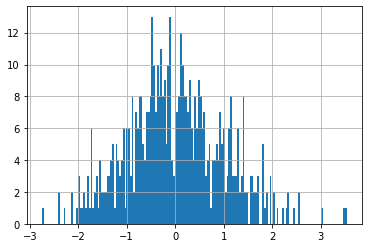

In [19]:
hist = iso_data['Z'].hist(bins=170)

In [34]:
def get_pow(iso):
    i = 0
    while i < 170:
        floor = -2.3 + (i * 0.03)
        if iso > floor:
            i += 1
        else:
            break
    return 70 + i
get_pow(2.5)

230

In [35]:
def assign_pow(year):
    iso_data = read_iso(2022)
    iso_data['Power'] = iso_data.apply(lambda x: get_pow(x['Z']), axis=1)
    return iso_data[['PLAYERNAME', 'Power']].dropna()

pow_df = assign_pow(2022)
pow_df.head()

,PLAYERNAME,Power
405395,Albert Pujols,213
408234,Miguel Cabrera,110
425877,Yadier Molina,118
429664,Robinson Cano,80
435559,Kurt Suzuki,128


In [1]:
hist = pow_df['Power'].hist(bins=10)

NameError: name 'pow_df' is not defined

In [38]:
pow_df[pow_df['Power'] >= 200]

,PLAYERNAME,Power
405395,Albert Pujols,213
502671,Paul Goldschmidt,208
519203,Anthony Rizzo,200
519317,Giancarlo Stanton,208
521692,Salvador Perez,201
545361,Mike Trout,240
547180,Bryce Harper,215
571448,Nolan Arenado,204
572204,Trayce Thompson,210
572287,Mike Zunino,221


In [39]:
pow_df.to_csv('2022_Power.csv')